#Load nessessary libraries

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np

#Load the data

[Link](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data) to `imdb.load_data`.

In [2]:
vocabulary_size = 5000 # maximum size of vocabulary

max_review_length = 500 # maximum length of each review

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen = max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen = max_review_length)

#Feedforward networks without embeddings

- Single hidden layer: 250 neurons

- Output layer: you have to set it

In [ ]:
model1 = Sequential()

model1.add(Dense(250, input_shape=(max_review_length,), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


print(model1.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 250)               125250    
                                                                 
 dense_28 (Dense)            (None, 1)                 251       
                                                                 
Total params: 125,501
Trainable params: 125,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1=model1.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test), batch_size = 128, verbose = 2)



Epoch 1/10
196/196 - 2s - loss: 99.0660 - accuracy: 0.4989 - val_loss: 51.0719 - val_accuracy: 0.5018 - 2s/epoch - 9ms/step
Epoch 2/10
196/196 - 1s - loss: 26.9068 - accuracy: 0.5686 - val_loss: 24.8197 - val_accuracy: 0.5019 - 1s/epoch - 6ms/step
Epoch 3/10
196/196 - 1s - loss: 9.4498 - accuracy: 0.6461 - val_loss: 14.6082 - val_accuracy: 0.5032 - 1s/epoch - 5ms/step
Epoch 4/10
196/196 - 1s - loss: 3.9321 - accuracy: 0.7119 - val_loss: 9.8009 - val_accuracy: 0.5055 - 1s/epoch - 5ms/step
Epoch 5/10
196/196 - 1s - loss: 2.0478 - accuracy: 0.7520 - val_loss: 7.0877 - val_accuracy: 0.5065 - 1s/epoch - 5ms/step
Epoch 6/10
196/196 - 1s - loss: 1.2217 - accuracy: 0.7821 - val_loss: 5.4887 - val_accuracy: 0.5074 - 1s/epoch - 6ms/step
Epoch 7/10
196/196 - 1s - loss: 0.8153 - accuracy: 0.8057 - val_loss: 4.7683 - val_accuracy: 0.5072 - 1s/epoch - 6ms/step
Epoch 8/10
196/196 - 1s - loss: 0.6406 - accuracy: 0.8236 - val_loss: 4.4523 - val_accuracy: 0.5033 - 1s/epoch - 6ms/step
Epoch 9/10
196/196 

In [ ]:
scores = model1.evaluate(X_test,y_test)

print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 2s 3ms/step - loss: 4.3738 - accuracy: 0.5086
Accuracy: 50.86%


#Feedforward networks with embeddings

- Embedding layer: `embedding_dim = 100`

- Flatten layer

- Dense layer: 250 neurons

- Ouput layer

In [5]:
from keras.layers import Dropout, BatchNormalization

In [6]:
embedding_dim = 100

In [ ]:
model2 = Sequential()

model2.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model2.add(Flatten())
#model2.add(Dense(250, activation='relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 100)          500000    
                                                                 
 flatten_10 (Flatten)        (None, 50000)             0         
                                                                 
 dense_31 (Dense)            (None, 1)                 50001     
                                                                 
Total params: 550,001
Trainable params: 550,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test), batch_size = 128, verbose = 2)


Epoch 1/5
196/196 - 3s - loss: 0.5065 - accuracy: 0.7383 - val_loss: 0.3251 - val_accuracy: 0.8615 - 3s/epoch - 13ms/step
Epoch 2/5
196/196 - 2s - loss: 0.2370 - accuracy: 0.9082 - val_loss: 0.2734 - val_accuracy: 0.8861 - 2s/epoch - 10ms/step
Epoch 3/5
196/196 - 2s - loss: 0.1519 - accuracy: 0.9496 - val_loss: 0.2795 - val_accuracy: 0.8830 - 2s/epoch - 9ms/step
Epoch 4/5
196/196 - 2s - loss: 0.0886 - accuracy: 0.9804 - val_loss: 0.2922 - val_accuracy: 0.8812 - 2s/epoch - 9ms/step
Epoch 5/5
196/196 - 2s - loss: 0.0481 - accuracy: 0.9939 - val_loss: 0.3081 - val_accuracy: 0.8791 - 2s/epoch - 10ms/step


In [ ]:
scores = model2.evaluate(X_test,y_test)

print("Accuracy: %.2f%%" % (scores[1]*100))


782/782 [==============================] - 2s 3ms/step - loss: 0.3081 - accuracy: 0.8791
Accuracy: 87.91%


##Observations:##
1. Embedding layer improves both the training and test accuracy significantly.
1. However, the model is stubborndly overfitted despite several attempts at dropouts and #neurons!!

#CNN

#Feedforward networks with embeddings

- Embedding layer: `embedding_dim = 100`

- Conv1D: 200 filter, kernel size 3, same padding

- MaxPooling layer: ppoling size 2

- Flatten layer

- Dense layer: 250 neurons

- Ouput layer

In [ ]:
embedding_dim = 100

In [ ]:
model3 = Sequential()

model3.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model3.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dropout(0.5))
#model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

print(model3.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 500, 100)          500000    
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 32)           9632      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 8000)              0         
                                                                 
 dropout_13 (Dropout)        (None, 8000)              0         
                                                                 
 dense_33 (Dense)            (None, 1)                 8001      
                                                     

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history3=model3.fit(X_train, y_train, epochs = 15, validation_data=(X_test, y_test), batch_size = 128, verbose = 2)

Epoch 1/15
196/196 - 5s - loss: 0.5269 - accuracy: 0.7019 - val_loss: 0.2890 - val_accuracy: 0.8804 - 5s/epoch - 24ms/step
Epoch 2/15
196/196 - 4s - loss: 0.2502 - accuracy: 0.9011 - val_loss: 0.2705 - val_accuracy: 0.8889 - 4s/epoch - 19ms/step
Epoch 3/15
196/196 - 4s - loss: 0.1943 - accuracy: 0.9245 - val_loss: 0.2819 - val_accuracy: 0.8843 - 4s/epoch - 19ms/step
Epoch 4/15
196/196 - 3s - loss: 0.1647 - accuracy: 0.9372 - val_loss: 0.3000 - val_accuracy: 0.8808 - 3s/epoch - 17ms/step
Epoch 5/15
196/196 - 4s - loss: 0.1363 - accuracy: 0.9493 - val_loss: 0.3206 - val_accuracy: 0.8774 - 4s/epoch - 19ms/step
Epoch 6/15
196/196 - 3s - loss: 0.1162 - accuracy: 0.9573 - val_loss: 0.3474 - val_accuracy: 0.8742 - 3s/epoch - 17ms/step
Epoch 7/15
196/196 - 4s - loss: 0.0933 - accuracy: 0.9677 - val_loss: 0.3785 - val_accuracy: 0.8729 - 4s/epoch - 19ms/step
Epoch 8/15
196/196 - 4s - loss: 0.0762 - accuracy: 0.9731 - val_loss: 0.4141 - val_accuracy: 0.8703 - 4s/epoch - 19ms/step
Epoch 9/15
196/1

In [ ]:
scores = model3.evaluate(X_test,y_test)

print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 3s 4ms/step - loss: 0.6328 - accuracy: 0.8654
Accuracy: 86.54%


##Observations:##
1. Embedding layer improves both the training and test accuracy significantly as have observed in both experiments.
1. The CNN model (Model 3), similar to the feedforward neural network in Model 2, is stubborndly overfitted despite several attempts at dropouts and #neurons!!

#Simple RNN

- Embedding layer: `embedding_dim = 100`

- SimpleRNN layer: `units = 100`

- Ouput layer

In [ ]:
embedding_dim = 100

In [7]:
from keras import initializers

In [ ]:
model4 = Sequential()

model4.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length = max_review_length))
model4.add(SimpleRNN(5, 
                    kernel_initializer=initializers.RandomNormal(stddev=0.001), 
                    recurrent_initializer=initializers.Identity(gain=1.0),
                     activation='relu',
                     input_length=len(X_train[0])))
model4.add(Dense(1, activation='sigmoid'))

print(model4.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 500, 100)          500000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 530       
                                                                 
 dense_35 (Dense)            (None, 1)                 6         
                                                                 
Total params: 500,536
Trainable params: 500,536
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history4=model4.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test), batch_size = 32, verbose = 2)

Epoch 1/5
782/782 - 551s - loss: 0.4376 - accuracy: 0.8008 - val_loss: 0.2925 - val_accuracy: 0.8779 - 551s/epoch - 704ms/step
Epoch 2/5
782/782 - 552s - loss: 0.2436 - accuracy: 0.9021 - val_loss: 0.2901 - val_accuracy: 0.8809 - 552s/epoch - 706ms/step
Epoch 3/5
782/782 - 558s - loss: 0.2072 - accuracy: 0.9204 - val_loss: 0.2929 - val_accuracy: 0.8753 - 558s/epoch - 714ms/step
Epoch 4/5
782/782 - 554s - loss: 0.1862 - accuracy: 0.9280 - val_loss: 0.3328 - val_accuracy: 0.8752 - 554s/epoch - 708ms/step
Epoch 5/5
782/782 - 558s - loss: 0.1671 - accuracy: 0.9350 - val_loss: 0.3630 - val_accuracy: 0.8605 - 558s/epoch - 713ms/step


In [ ]:
scores = model4.evaluate(X_test,y_test)

print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 47s 60ms/step - loss: 0.3630 - accuracy: 0.8605
Accuracy: 86.05%


In [33]:
import matplotlib.pyplot as plt

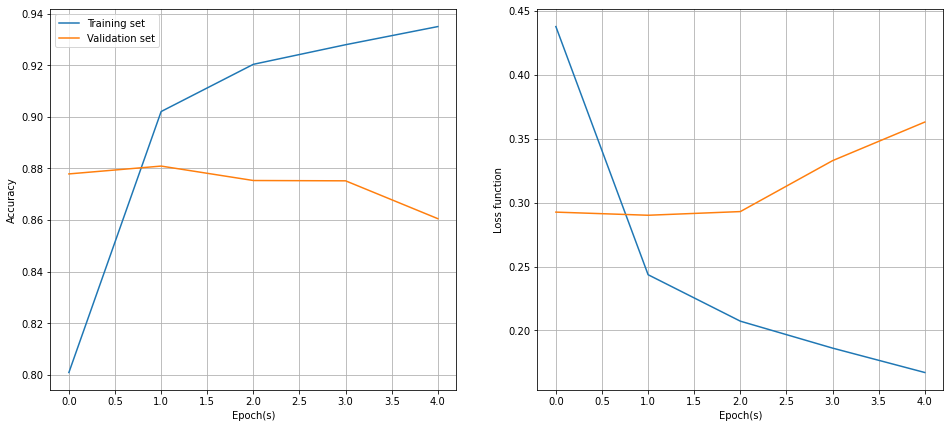

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label = "Training set")
plt.plot(history4.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history4.history['loss'], label = "Training set")
plt.plot(history4.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

##Observations##
1. Reducing the number of hidden units in RNN have reduced the overfitting but the rate of overfitting is far from over! 
   -   Falling validation accuracy after 1 epoch
   -   Rising validation loss after 2 epochs
2. Additional regularization tools such as dropouts and reducing embedding_dim should be considered.


#LSTM

- Embedding layer: `embedding_dim = 100`

- LSTM layer: `units = 100`

- Ouput layer

In [ ]:
embedding_dim = 50 

In [ ]:
model5 = Sequential()

model5.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model5.add(LSTM(50, activation='relu', recurrent_dropout=0.5))
model5.add(Dense(1, activation='sigmoid'))


print(model5.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 500, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense_36 (Dense)            (None, 1)                 51        
                                                                 
Total params: 270,251
Trainable params: 270,251
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history5=model5.fit(X_train, y_train, epochs = 3, validation_data=(X_test, y_test), batch_size = 128, verbose = 2)


Epoch 1/3
196/196 - 517s - loss: 42455136.0000 - accuracy: 0.6487 - val_loss: 0.6167 - val_accuracy: 0.7072 - 517s/epoch - 3s/step
Epoch 2/3
196/196 - 513s - loss: 0.5975 - accuracy: 0.7228 - val_loss: 0.6239 - val_accuracy: 0.6028 - 513s/epoch - 3s/step
Epoch 3/3
196/196 - 512s - loss: 0.5853 - accuracy: 0.7042 - val_loss: 0.5814 - val_accuracy: 0.7164 - 512s/epoch - 3s/step


In [ ]:
scores = model5.evaluate(X_test,y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 142s 182ms/step - loss: 0.5814 - accuracy: 0.7164
Accuracy: 71.64%


#CNN + LSTM

- Embedding layer: `embedding_dim = 100`

- Conv1D: 200 filter, kernel size 3, same padding

- MaxPooling layer: pooling size 2

- LSTM layer: `units = 100`


- Ouput layer

In [8]:
embedding_dim = 100

In [ ]:
model6 = Sequential()

model6.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model6.add(Conv1D(200, kernel_size=3, activation='relu', padding='same'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(LSTM(100, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))


print(model6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           1000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 200)           60200     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 200)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [ ]:
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history6=model6.fit(X_train, y_train, epochs = 3, validation_data=(X_test, y_test), batch_size = 64, verbose = 2)


Epoch 1/3
391/391 - 25s - loss: 0.5054 - accuracy: 0.7452 - val_loss: 0.4286 - val_accuracy: 0.7993 - 25s/epoch - 64ms/step
Epoch 2/3
391/391 - 21s - loss: 0.3871 - accuracy: 0.8234 - val_loss: 0.4474 - val_accuracy: 0.7930 - 21s/epoch - 55ms/step
Epoch 3/3
391/391 - 21s - loss: 0.3426 - accuracy: 0.8476 - val_loss: 0.6171 - val_accuracy: 0.7412 - 21s/epoch - 54ms/step


In [ ]:
scores = model6.evaluate(X_test,y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 6s 7ms/step - loss: 0.6171 - accuracy: 0.7412
Accuracy: 74.12%


In [21]:
from keras.layers import Activation
from keras.layers import CuDNNLSTM

#Model6 using CuDNN LSTM to improve speed of execution!!#

In [27]:
model6 = Sequential()

model6.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model6.add(Conv1D(200, kernel_size=3, activation='relu', padding='same'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(CuDNNLSTM(100))
model6.add(Activation('relu'))
model6.add(Dense(1, activation='sigmoid'))


print(model6.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 100)          500000    
                                                                 
 conv1d_8 (Conv1D)           (None, 500, 200)          60200     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 250, 200)         0         
 1D)                                                             
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 100)               120800    
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                      

In [28]:
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



In [29]:
history6=model6.fit(X_train, y_train, epochs = 3, validation_data=(X_test, y_test), batch_size = 64, verbose = 1)


Epoch 1/3
391/391 [==============================] - 34s 82ms/step - loss: 0.4275 - accuracy: 0.8003 - val_loss: 0.3024 - val_accuracy: 0.8716
Epoch 2/3
391/391 [==============================] - 32s 83ms/step - loss: 0.2759 - accuracy: 0.8892 - val_loss: 0.3643 - val_accuracy: 0.8425
Epoch 3/3
391/391 [==============================] - 32s 82ms/step - loss: 0.2311 - accuracy: 0.9097 - val_loss: 0.2779 - val_accuracy: 0.8848


In [30]:
history6cont=model6.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test), batch_size = 64, verbose = 1)

Epoch 1/5
391/391 [==============================] - 33s 83ms/step - loss: 0.2004 - accuracy: 0.9240 - val_loss: 0.2820 - val_accuracy: 0.8910
Epoch 2/5
391/391 [==============================] - 32s 81ms/step - loss: 0.1749 - accuracy: 0.9343 - val_loss: 0.2999 - val_accuracy: 0.8879
Epoch 3/5
391/391 [==============================] - 32s 83ms/step - loss: 0.1539 - accuracy: 0.9440 - val_loss: 0.3774 - val_accuracy: 0.8686
Epoch 4/5
391/391 [==============================] - 33s 83ms/step - loss: 0.1287 - accuracy: 0.9539 - val_loss: 0.3393 - val_accuracy: 0.8720
Epoch 5/5
391/391 [==============================] - 33s 84ms/step - loss: 0.1101 - accuracy: 0.9620 - val_loss: 0.3233 - val_accuracy: 0.8882


**Combine the 2 sessions of model 6**

In [32]:
history6_comb = {key:history6.history[key]+history6cont.history[key] for key in history6.history}

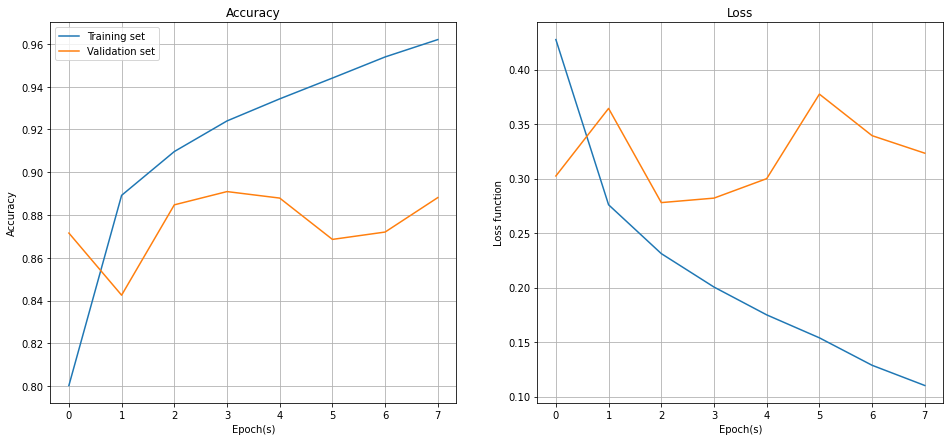

In [36]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history6_comb['accuracy'], label = "Training set")
plt.plot(history6_comb['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history6_comb['loss'], label = "Training set")
plt.plot(history6_comb['val_loss'], label = "Validation set")
plt.title('Loss')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

#Model7#

In [42]:
model7 = Sequential()

model7.add(Embedding(vocabulary_size, embedding_dim, input_length = max_review_length))
model7.add(Conv1D(200, kernel_size=3, activation='relu', padding='same'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(CuDNNLSTM(100))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))
model7.add(Dense(1, activation='sigmoid'))


print(model7.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 100)          500000    
                                                                 
 conv1d_12 (Conv1D)          (None, 500, 200)          60200     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 250, 200)         0         
 g1D)                                                            
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 100)               120800    
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                     

In [43]:
model7.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



In [45]:
history7=model7.fit(X_train, y_train, epochs = 3, validation_data=(X_test, y_test), batch_size = 64, verbose = 1)


Epoch 1/3
391/391 [==============================] - 34s 83ms/step - loss: 0.4497 - accuracy: 0.7840 - val_loss: 0.3010 - val_accuracy: 0.8720
Epoch 2/3
391/391 [==============================] - 32s 83ms/step - loss: 0.2832 - accuracy: 0.8902 - val_loss: 0.3324 - val_accuracy: 0.8543
Epoch 3/3
391/391 [==============================] - 32s 81ms/step - loss: 0.2343 - accuracy: 0.9108 - val_loss: 0.3054 - val_accuracy: 0.8827
